# 第３回　ネットワークの描画

---

### 発表資料や論文では，直観的な理解しやすさが重視されます．
### 今回はその一部「計算結果の可視化」を学びます．

In [1]:
import numpy as np
import pandas as pd
import networkx as nx

#matplotlib関連
import matplotlib.pyplot as plt
%matplotlib inline

### とりあえず座標データだけプロットしてみる

In [3]:
path = '../datafile/siouxFalls_node.tntp'
df = pd.read_csv(path, '\t', index_col=0)

In [4]:
df

,X,Y,;
Node,,,
1,-96.770420,43.612828,;
2,-96.711251,43.605813,;
3,-96.774303,43.572962,;
4,-96.747168,43.563654,;
5,-96.731569,43.564034,;
6,-96.711644,43.587586,;
7,-96.693423,43.563844,;
8,-96.711382,43.562324,;
9,-96.731241,43.548596,;


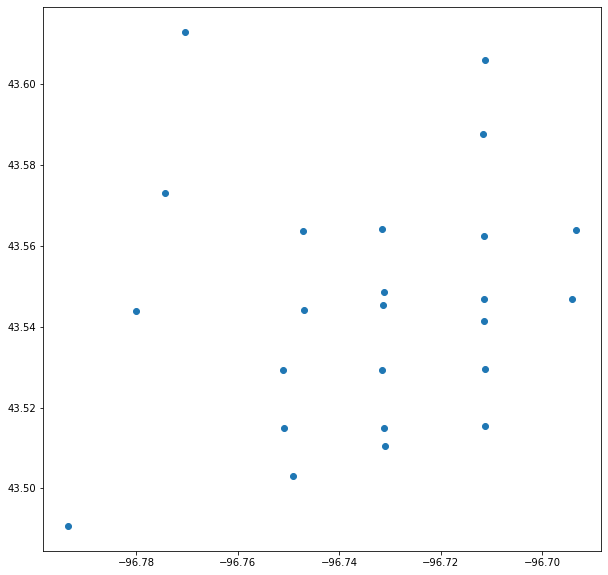

In [5]:
plt.figure(figsize=(10,10))
plt.scatter(df['X'], df['Y'])

## これではよくわからないので， ネットワークの接続情報も追加しよう

In [6]:
netfile = '../datafile/siouxFalls_net.tntp'
net = pd.read_csv(netfile, skiprows=8, sep='\t')

trimmed= [s.strip().lower() for s in net.columns]
net.columns = trimmed

# And drop the silly first and last columns
net.drop(['~', ';'], axis=1, inplace=True)

In [7]:
# networkX のグラフの作り方
G = nx.DiGraph()
for i in range(net.shape[0]):
    G.add_edge(net['init_node'][i], net['term_node'][i])

In [8]:
# 座標リストの作成
try:
    pos = {i : (df['X'][i], df['Y'][i]) for i in df.index}#元データが大文字か
except KeyError:
    pos = {i : (df['x'][i], df['y'][i]) for i in df.index}#小文字か

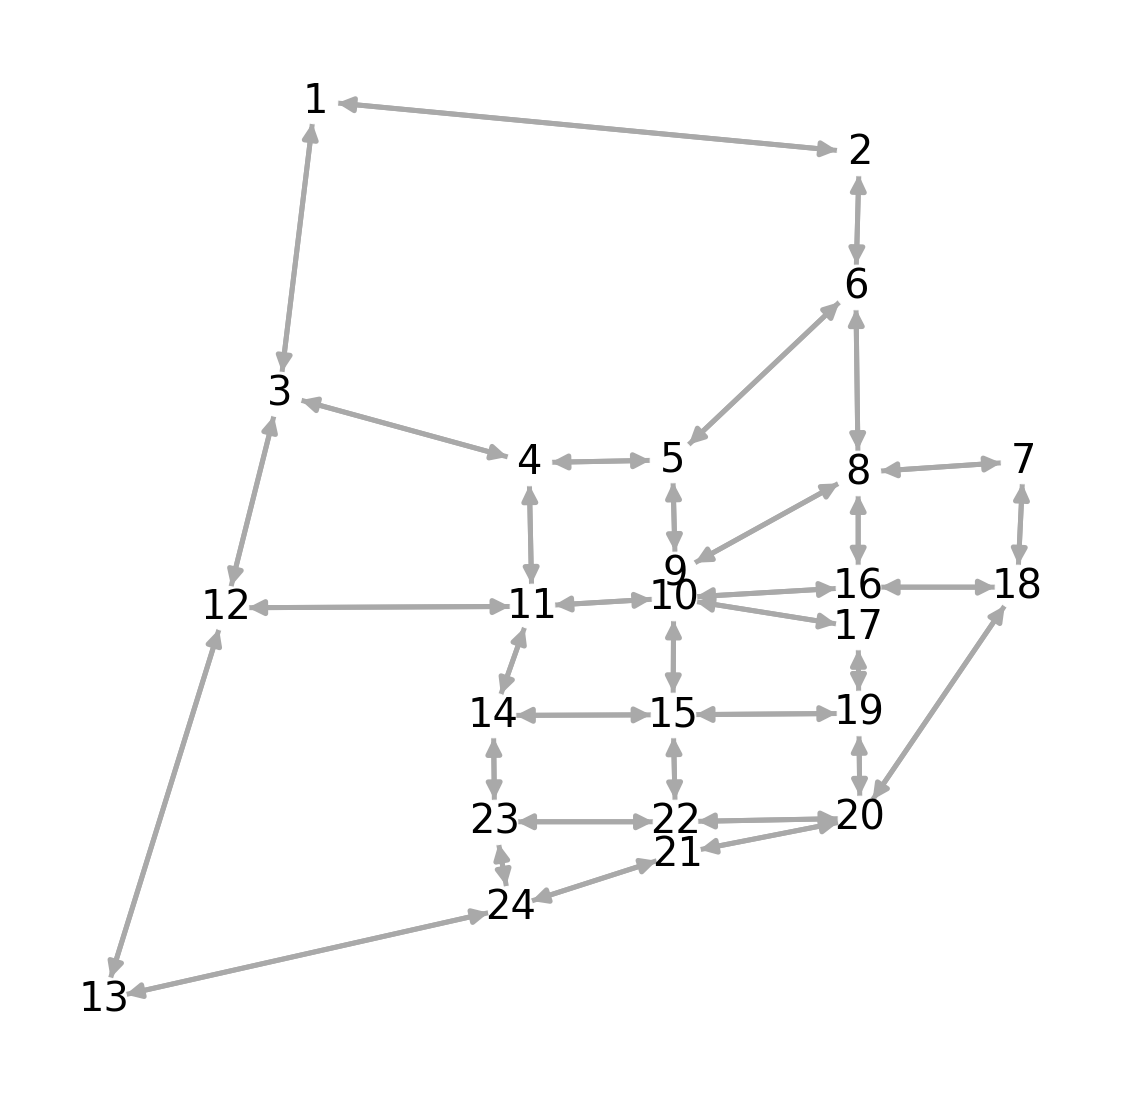

In [62]:
# networkX 内にグラフ描画機能があるのでそれを使う
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, arrows=True, arrowsize=30, edge_color="darkgray", node_color="w", width=5, node_size=2000, font_size=40)
plt.axis('off')
plt.show()

### 色や太さはリストでも入れられる

In [19]:
path = '../datafile/siouxFalls_flow.tntp'
df = pd.read_csv(path, '\t')
df

C:\Users\MasanaoWakui\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


,From,To,Volume,Cost
0,1,2,4494.657646,6.000816
1,1,3,8119.079948,4.008691
2,2,1,4519.079948,6.000834
3,2,6,5967.336396,6.573598
4,3,1,8094.657646,4.008587
...,...,...,...,...
71,23,22,9626.210200,12.243138
72,23,24,7902.983927,3.759304
73,24,13,11112.394731,17.617021
74,24,21,10259.524716,11.752579


In [24]:
df.columns

Index(['From ', 'To ', 'Volume ', 'Cost '], dtype='object')

In [28]:
tate = np.array(df["Cost "])

In [27]:
fft  = np.array(net["free_flow_time"])

In [31]:
color = (tate - fft)/fft
color

array([1.36039559e-04, 2.17268755e-03, 1.39020499e-04, 3.14719651e-01,
       2.14666337e-03, 6.73504581e-02, 5.04478891e-03, 6.78169390e-02,
       1.57687053e-01, 1.88883413e-01, 1.58536114e-01, 1.49955630e+00,
       9.30262141e-01, 3.19903533e-01, 1.50517564e+00, 6.34547750e+00,
       8.50720127e-01, 3.11128436e-02, 6.41207976e+00, 8.33804321e-01,
       5.17470751e-01, 1.14589471e+00, 9.34030912e-01, 5.03786950e-01,
       8.94177684e-01, 9.05747795e-01, 1.48113789e+00, 1.28706171e+00,
       4.02120249e+00, 1.03850214e+00, 2.03837426e-01, 1.44065091e+00,
       1.26503794e+00, 2.42282142e+00, 4.94762186e-03, 1.28919261e+00,
       7.59884789e-03, 7.82655719e-03, 3.41525193e+00, 2.46066126e+00,
       1.44686783e+00, 1.26983608e+00, 1.30192674e+00, 1.47492097e+00,
       4.42070693e-01, 2.02938122e+00, 1.15576231e+00, 4.05906892e+00,
       3.75072925e+00, 5.44882681e-02, 1.03850214e+00, 3.73642721e+00,
       2.71831340e+00, 3.15931925e-02, 5.52782919e-02, 6.48427718e-02,
      

In [40]:
color = ["red"]*12 + ["blue"]*12
wide  = [i*0.1 for i in range(76)]

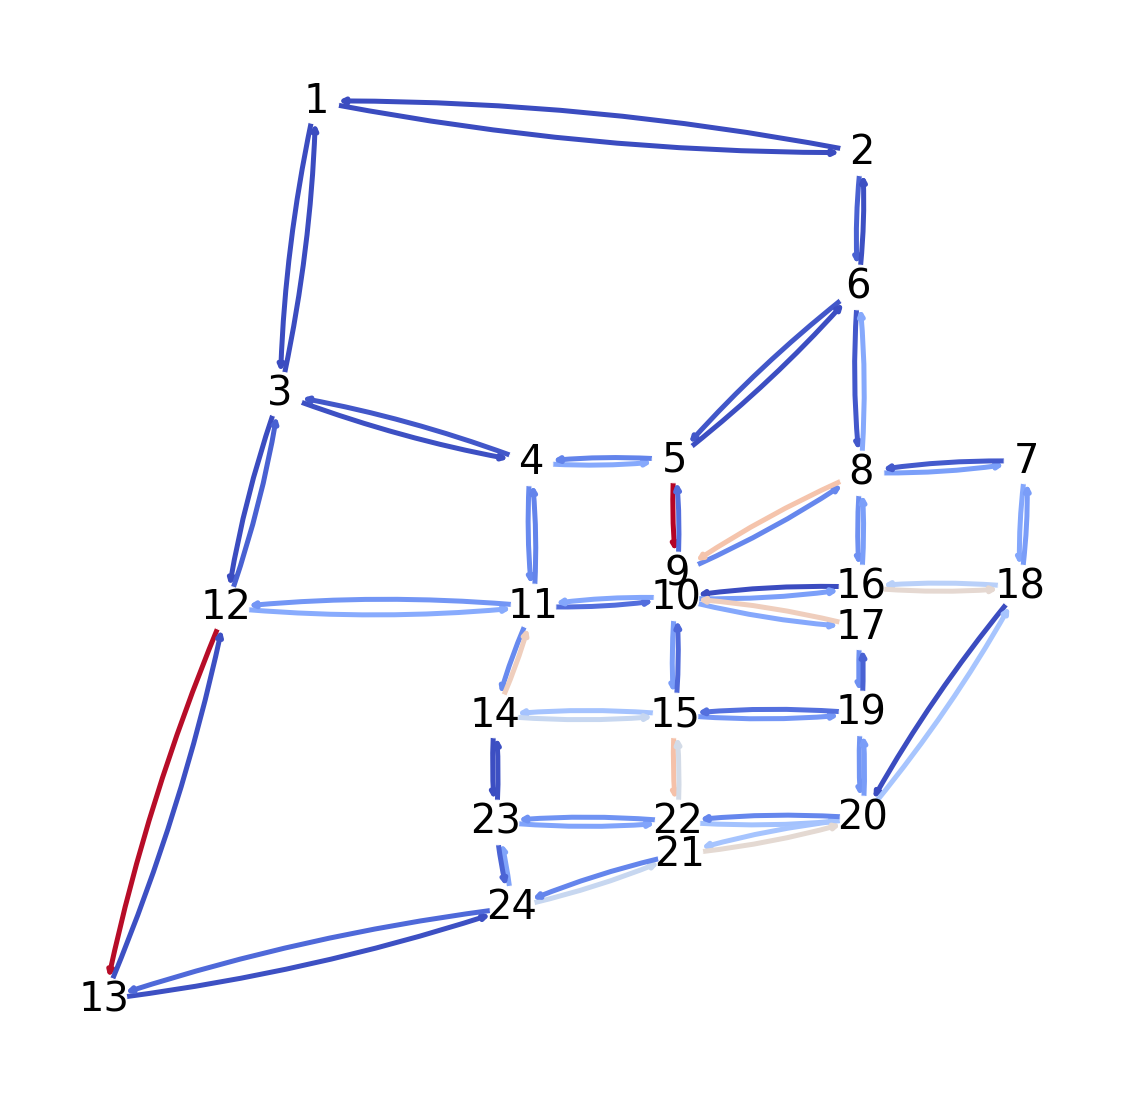

In [61]:
plt.figure(figsize=(20,20))
nx.draw_networkx(G, pos=pos, arrows=True, arrowsize=10, edge_color=color, edge_cmap=plt.cm.coolwarm, node_color="w", width=5, node_size=2000, font_size=40, connectionstyle="arc3,rad=0.05")
plt.axis('off')
plt.show()

他にもいろいろな引数が[公式](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html)に公開されているので，試してみて．

# 課題：

## Frank-Wolfe 法で解いた均衡状態の渋滞状況を，ネットワーク上に図示してくる．

- 各リンクの渋滞状況（例えば ff-time からの上がり具合）を数値化・リスト化してリンクに色を付ければいい．

- カーナビみたいに見やすいのができるとベスト．

